In [1]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# import sys
import matplotlib.dates as mdates
import datetime as dt

Using TensorFlow backend.


In [2]:
features = ['Open', 'High', 'Low', 'Close', 'Shares Traded']

# data from 1-1-2011 to 31-12-2016
dataset = pandas.read_csv('data_new/NSE-NIFTY_50.csv')
index_first, index_last = 0, 0
for row in range(len(dataset)):
    if dataset['Date'][row] == '2011-01-03':
        index_last = row
    if dataset['Date'][row] == '2016-12-30':
        index_first = row
dataset = dataset[index_first:index_last+1]
indexes = dataset.index.values[::-1]
indexes = list(map(lambda x: x-indexes[-1], indexes))
dataset.index = indexes
dataset = dataset.iloc[::-1][features]

# find NaN values and fill it
for row in range(len(dataset)):
    if dataset['Shares Traded'][row] != dataset['Shares Traded'][row]:
        dataset['Shares Traded'][row] = dataset['Shares Traded'][row-1]
# print(dataset)

In [3]:
def create_dataset(dataset, look_back=1, train_size=50):
    trainX, trainY, testX, testY = [], [], [], []
    for i in range(len(dataset) - look_back):
        x = dataset[i:(i+look_back), :]
        if i <= train_size:
            trainX.append(x)
            trainY.append(numpy.array([dataset[i+look_back, features.index('Close')]]))
        else:
            testX.append(x)
            testY.append(numpy.array([dataset[i+look_back, features.index('Close')]]))
    return numpy.array(trainX), numpy.array(trainY), numpy.array(testX), numpy.array(testY)
window_size = 22
train_size = 1180
test_size = len(dataset) - train_size

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
train_x, train_y, test_x, test_y = create_dataset(dataset, window_size, train_size)

In [4]:
model = Sequential()
model.add(LSTM(128, input_shape=(window_size, len(features)), return_sequences=True))
model.add(LSTM(64, input_shape=(window_size, len(features)), return_sequences=False))
model.add(Dense(16, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='linear'))

/home/thanhdat/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, kernel_initializer="uniform", activation="relu")`
  after removing the cwd from sys.path.
/home/thanhdat/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear")`
  """


In [5]:
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mape'])
model.fit(train_x, train_y, epochs=500, batch_size=100, verbose=2)

Epoch 1/500
1s - loss: 0.1265 - mean_absolute_percentage_error: 64287.5524
Epoch 2/500
0s - loss: 0.0152 - mean_absolute_percentage_error: 77038.3203
Epoch 3/500
0s - loss: 0.0093 - mean_absolute_percentage_error: 71249.6906
Epoch 4/500
0s - loss: 0.0058 - mean_absolute_percentage_error: 73481.8827
Epoch 5/500
0s - loss: 0.0032 - mean_absolute_percentage_error: 82234.6863
Epoch 6/500
0s - loss: 0.0071 - mean_absolute_percentage_error: 53230.4003
Epoch 7/500
0s - loss: 0.0060 - mean_absolute_percentage_error: 88740.5207
Epoch 8/500
0s - loss: 0.0046 - mean_absolute_percentage_error: 81711.4580
Epoch 9/500
0s - loss: 0.0039 - mean_absolute_percentage_error: 67197.1911
Epoch 10/500
0s - loss: 0.0036 - mean_absolute_percentage_error: 83801.7428
Epoch 11/500
0s - loss: 0.0055 - mean_absolute_percentage_error: 78980.4403
Epoch 12/500
0s - loss: 0.0051 - mean_absolute_percentage_error: 58736.4037
Epoch 13/500
0s - loss: 0.0034 - mean_absolute_percentage_error: 86828.8821
Epoch 14/500
0s - los

0s - loss: 0.0011 - mean_absolute_percentage_error: 27222.0122
Epoch 110/500
0s - loss: 0.0010 - mean_absolute_percentage_error: 33619.9023
Epoch 111/500
0s - loss: 6.1884e-04 - mean_absolute_percentage_error: 28756.4659
Epoch 112/500
0s - loss: 0.0013 - mean_absolute_percentage_error: 31161.2773
Epoch 113/500
0s - loss: 5.1224e-04 - mean_absolute_percentage_error: 25533.7271
Epoch 114/500
0s - loss: 0.0014 - mean_absolute_percentage_error: 28181.6416
Epoch 115/500
0s - loss: 7.6578e-04 - mean_absolute_percentage_error: 31256.6933
Epoch 116/500
0s - loss: 8.1632e-04 - mean_absolute_percentage_error: 27483.7353
Epoch 117/500
0s - loss: 9.7436e-04 - mean_absolute_percentage_error: 28823.1178
Epoch 118/500
0s - loss: 0.0010 - mean_absolute_percentage_error: 26295.4688
Epoch 119/500
0s - loss: 7.2968e-04 - mean_absolute_percentage_error: 27165.5261
Epoch 120/500
0s - loss: 0.0011 - mean_absolute_percentage_error: 26810.7377
Epoch 121/500
0s - loss: 7.0183e-04 - mean_absolute_percentage_err

0s - loss: 7.1343e-04 - mean_absolute_percentage_error: 29176.2923
Epoch 212/500
0s - loss: 5.8737e-04 - mean_absolute_percentage_error: 31724.0892
Epoch 213/500
0s - loss: 5.2044e-04 - mean_absolute_percentage_error: 30910.9053
Epoch 214/500
0s - loss: 3.9608e-04 - mean_absolute_percentage_error: 22553.0604
Epoch 215/500
0s - loss: 7.1165e-04 - mean_absolute_percentage_error: 28167.9862
Epoch 216/500
0s - loss: 5.5269e-04 - mean_absolute_percentage_error: 24213.7756
Epoch 217/500
0s - loss: 5.2936e-04 - mean_absolute_percentage_error: 26597.1547
Epoch 218/500
0s - loss: 6.0158e-04 - mean_absolute_percentage_error: 26427.5964
Epoch 219/500
0s - loss: 4.8543e-04 - mean_absolute_percentage_error: 28888.6791
Epoch 220/500
0s - loss: 6.5514e-04 - mean_absolute_percentage_error: 26624.9254
Epoch 221/500
0s - loss: 4.5711e-04 - mean_absolute_percentage_error: 26298.1431
Epoch 222/500
0s - loss: 4.2405e-04 - mean_absolute_percentage_error: 25157.5149
Epoch 223/500
0s - loss: 6.4127e-04 - mean

1s - loss: 4.5721e-04 - mean_absolute_percentage_error: 25334.6805
Epoch 314/500
1s - loss: 4.7570e-04 - mean_absolute_percentage_error: 25636.7887
Epoch 315/500
0s - loss: 4.0085e-04 - mean_absolute_percentage_error: 26586.9523
Epoch 316/500
0s - loss: 4.8836e-04 - mean_absolute_percentage_error: 23411.1380
Epoch 317/500
0s - loss: 4.8131e-04 - mean_absolute_percentage_error: 20904.6486
Epoch 318/500
0s - loss: 4.1418e-04 - mean_absolute_percentage_error: 27436.9071
Epoch 319/500
0s - loss: 3.0425e-04 - mean_absolute_percentage_error: 22155.2855
Epoch 320/500
0s - loss: 6.5214e-04 - mean_absolute_percentage_error: 19006.4047
Epoch 321/500
1s - loss: 2.1833e-04 - mean_absolute_percentage_error: 18711.2219
Epoch 322/500
0s - loss: 5.6910e-04 - mean_absolute_percentage_error: 21976.3899
Epoch 323/500
0s - loss: 4.1954e-04 - mean_absolute_percentage_error: 21642.4723
Epoch 324/500
0s - loss: 3.8223e-04 - mean_absolute_percentage_error: 23973.1990
Epoch 325/500
0s - loss: 4.7423e-04 - mean

1s - loss: 3.7044e-04 - mean_absolute_percentage_error: 20282.2291
Epoch 416/500
1s - loss: 3.2495e-04 - mean_absolute_percentage_error: 19624.2468
Epoch 417/500
0s - loss: 4.4136e-04 - mean_absolute_percentage_error: 10640.6117
Epoch 418/500
0s - loss: 3.7288e-04 - mean_absolute_percentage_error: 21805.9135
Epoch 419/500
0s - loss: 3.4171e-04 - mean_absolute_percentage_error: 15269.1471
Epoch 420/500
0s - loss: 4.5798e-04 - mean_absolute_percentage_error: 19568.0021
Epoch 421/500
0s - loss: 3.5219e-04 - mean_absolute_percentage_error: 31911.8010
Epoch 422/500
0s - loss: 3.7689e-04 - mean_absolute_percentage_error: 19861.2012
Epoch 423/500
0s - loss: 2.8405e-04 - mean_absolute_percentage_error: 18460.2592
Epoch 424/500
0s - loss: 3.8143e-04 - mean_absolute_percentage_error: 20836.7126
Epoch 425/500
0s - loss: 3.3877e-04 - mean_absolute_percentage_error: 22071.0431
Epoch 426/500
0s - loss: 4.3591e-04 - mean_absolute_percentage_error: 24624.2800
Epoch 427/500
0s - loss: 3.5167e-04 - mean

(1181, 22, 5)

In [6]:
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

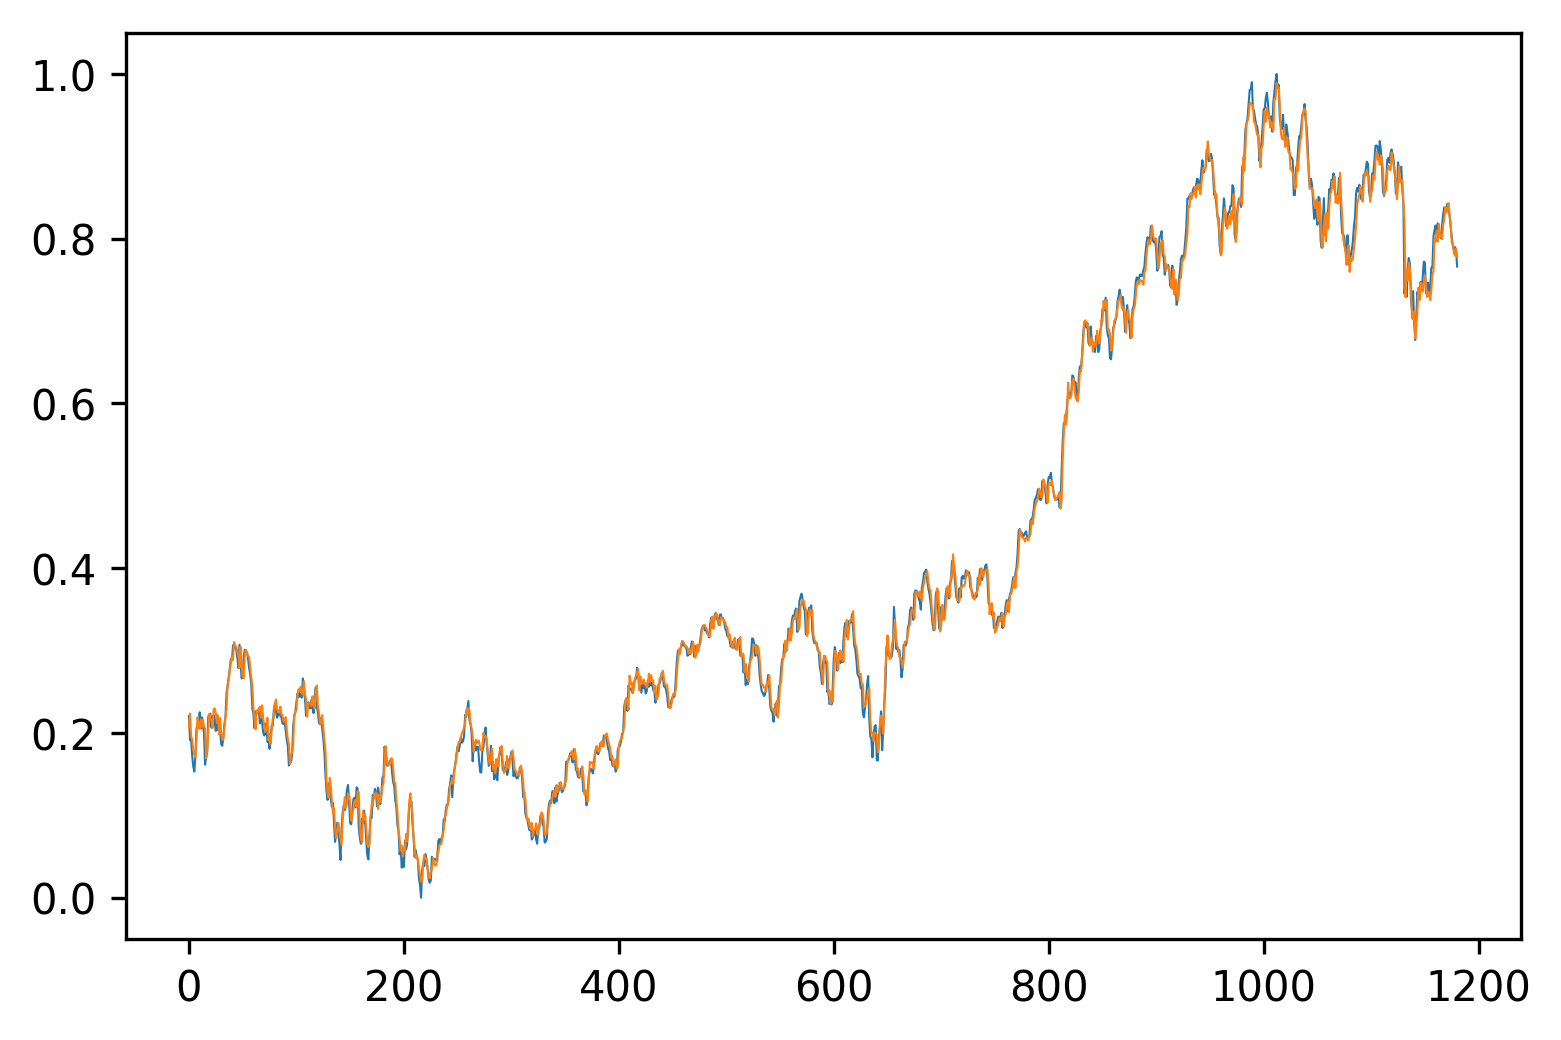

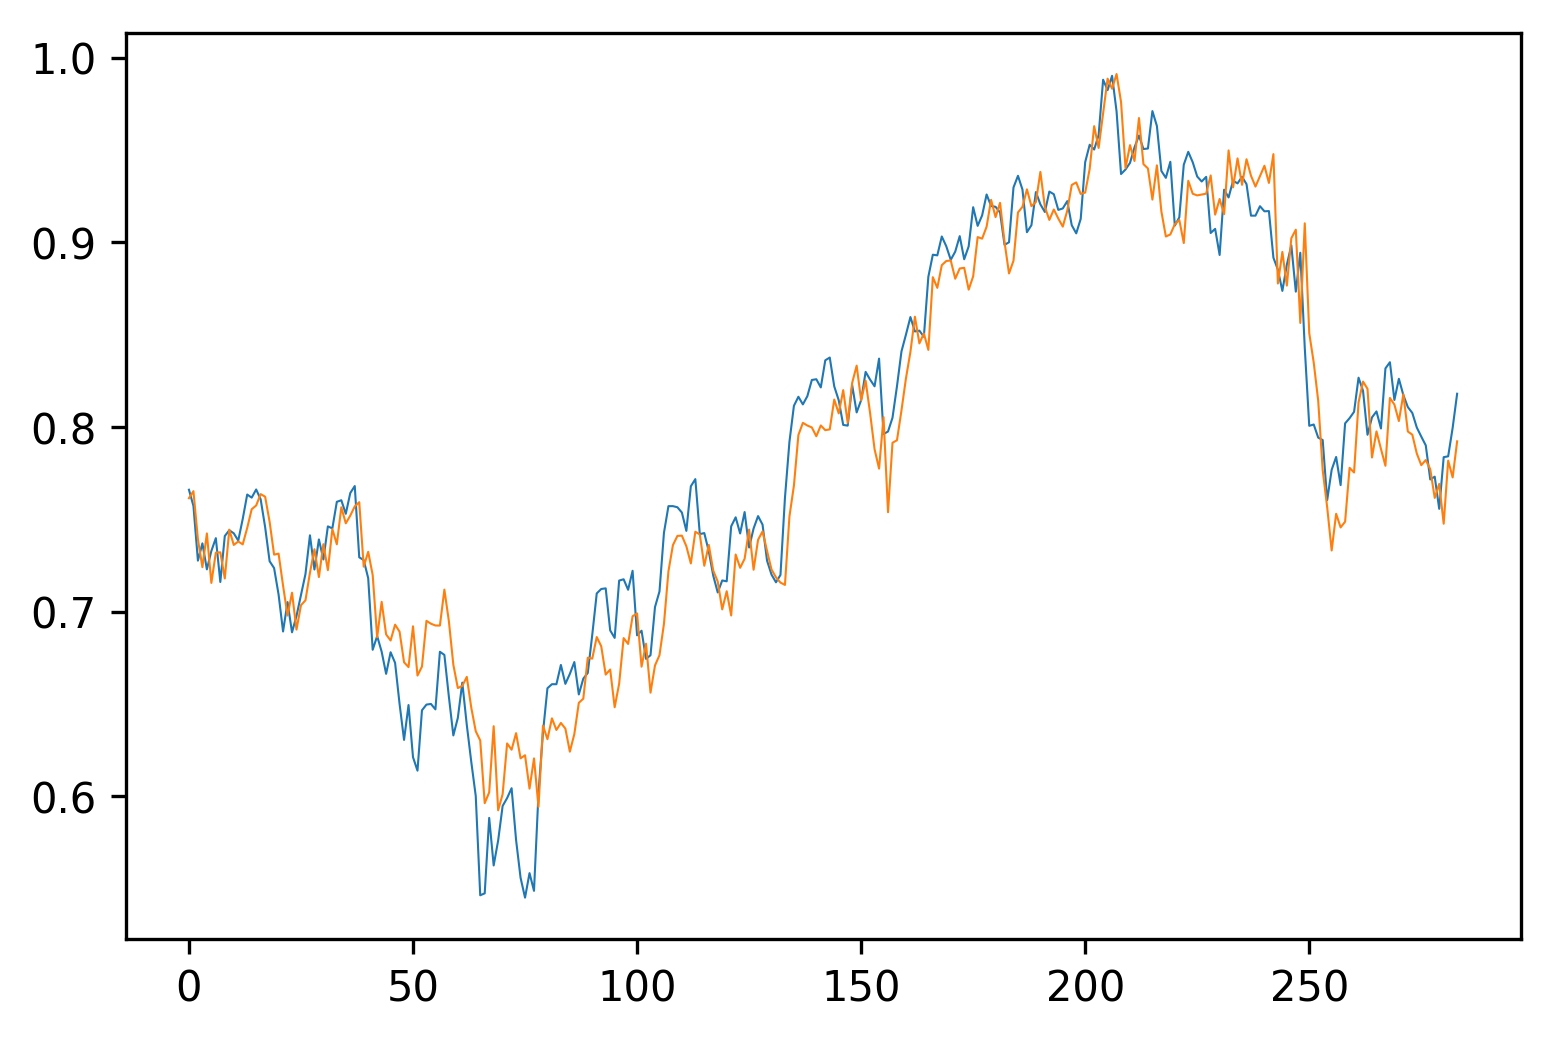

In [7]:
plt.figure(dpi=300)
plt.plot(train_y, linewidth=0.5)
plt.plot(train_predict, linewidth=0.5)
plt.show()

plt.figure(dpi=300)
plt.plot(test_y, linewidth=0.5)
plt.plot(test_predict, linewidth=0.5)
plt.show()

In [14]:
test_predicts = model.predict(test_x)
todays = test_x[:,-1,3]
trend_p = [int(numpy.sign(a-b)) for a,b in zip(test_predicts.reshape(-1), todays)]
trend_r = [int(numpy.sign(a-b)) for a,b in zip(test_y.reshape(-1), todays)]
trend = [1 if a == b else 0 for a, b in zip(trend_p, trend_r)]
print(numpy.mean(trend))

0.454225352113


In [15]:
train_predicts = model.predict(train_x)
todays = train_x[:,-1,3]
trend_p = [int(numpy.sign(a-b)) for a,b in zip(train_predicts.reshape(-1), todays)]
trend_r = [int(numpy.sign(a-b)) for a,b in zip(train_y.reshape(-1), todays)]
trend = [1 if a == b else 0 for a, b in zip(trend_p, trend_r)]
print(numpy.mean(trend))

0.640982218459


In [10]:
test_x.shape

(284, 22, 5)

In [13]:
test_x[:,-1, 3]

array([ 0.76622006,  0.76596175,  0.75717928,  0.72756371,  0.73691895,
        0.72282432,  0.73278602,  0.73973787,  0.71598477,  0.74090587,
        0.74400557,  0.74236588,  0.73840141,  0.75012635,  0.76335621,
        0.76168282,  0.76609652,  0.76080682,  0.74571265,  0.72723801,
        0.72353186,  0.70922384,  0.68918813,  0.70509091,  0.68872766,
        0.69762244,  0.70904415,  0.72027493,  0.74126526,  0.72275693,
        0.73904157,  0.7281814 ,  0.74611696,  0.74501634,  0.7594142 ,
        0.76026774,  0.75292281,  0.76417605,  0.76796083,  0.7293494 ,
        0.72785571,  0.71805123,  0.67926012,  0.68668366,  0.67826058,
        0.66623241,  0.67793488,  0.67218472,  0.64994778,  0.63045114,
        0.64934131,  0.62108467,  0.61378466,  0.64649993,  0.64957716,
        0.64993655,  0.64699408,  0.67819319,  0.67648611,  0.6539347 ,
        0.63287699,  0.64235577,  0.66147056,  0.63859346,  0.61859144,
        0.60006065,  0.5462989 ,  0.54733213,  0.58821217,  0.56